In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
def centerData(data):
    
    mu = np.mean(data,axis=0)
    data = data - mu
    
    return data, mu

def normalize(X):
    '''
    Function for normalizing the columns (variables) of a data matrix to unit length.
    Returns the normalized data and the L2 norm of the variables 
    
    Input  (X) --------> The data matrix to be normalized 
    Output (X_pre)-----> The normalized data matrix 
    Output (d) --------> Array with the L2 norms of the variables 
    '''
    d = np.linalg.norm(X,axis=0,ord=2)  # d is the euclidian lenghts of the variables 
    d[d==0]=1                           # Avoid dividing by zero if column L2 norm is zero 
    X_pre = X / d                       # Normalize the data with the euclidian lengths
    return X_pre,d                      # Return normalized data and the euclidian lengths



In [3]:
X_new = pd.read_csv('./Data/case1Data_Xnew.csv')
X_new = np.array(X_new)
print(X_new.shape)
data = pd.read_csv('./Data/case1Data.csv')
y = np.array(data['y'])
X = np.array(data.drop('y', axis=1).fillna(data.mean()))

(1000, 100)


In [4]:
X, mu = centerData(X)
X, d = normalize(X)
y = centerData(y)[0]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1312)

(100, 100)
(100,)


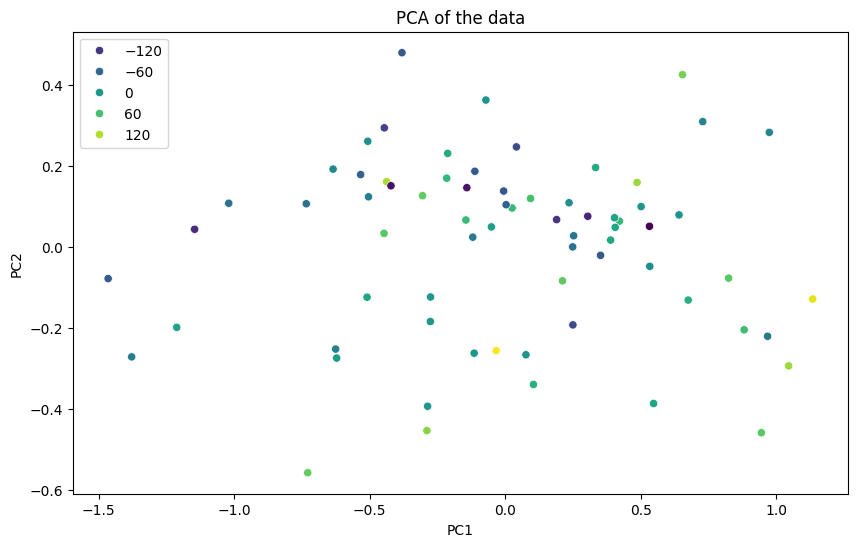

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plotting the PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of the data')
plt.show()

In [14]:
# Use PCA that covers 90% of the variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_pca.shape)

(70, 27)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest MSE: 2637.1061996686567
Best Random Forest params: {'n_estimators': 67}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\tamas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


Bagging MSE: 2921.1194606329705
Best Bagging params: {'n_estimators': 67}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Boosting MSE: 3332.211447357593
Best Boosting params: {'n_estimators': 90}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
SVR MSE: 4726.789681267118
Best SVR params: {'C': 100}


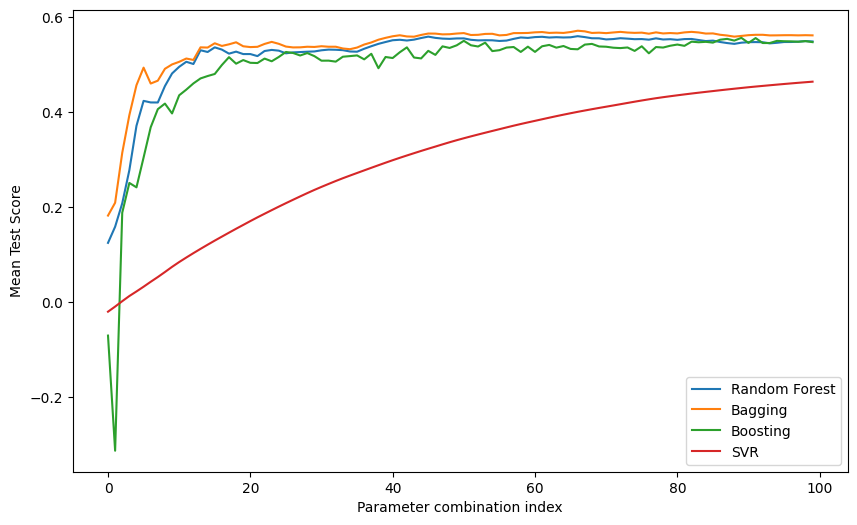

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Random Forest Regression with Bagging and Boosting
rf = RandomForestRegressor(random_state=1312)
dt = DecisionTreeRegressor(random_state=1312)
svr = SVR()
bagging = BaggingRegressor(dt, bootstrap=True, oob_score=True, random_state=1312)
boosting = AdaBoostRegressor(dt, random_state=1312)

param_grid_rf = {
    'n_estimators': range(1, 101)
}

param_grid_svr = {
    # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': range(1, 101)
}

param_grid_dt = {
    'n_estimators': range(1, 101)
}

param_grids = [param_grid_rf, param_grid_dt, param_grid_dt, param_grid_svr]

# Plot results
plt.figure(figsize=(10, 6))
for model, param_grid, name in zip([rf, bagging, boosting, svr], param_grids, ['Random Forest', 'Bagging', 'Boosting', 'SVR']):
    model_grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
    # Fit the grid search model
    model_grid.fit(X, y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    plt.plot(range(len(model_grid.cv_results_['mean_test_score'])), model_grid.cv_results_['mean_test_score'], label=name)
    print(f'{name} MSE: {mse}')
    print(f'Best {name} params: {model_grid.best_params_}')
plt.legend()
plt.xlabel('Parameter combination index')
plt.ylabel('Mean Test Score')
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest MSE: 3486.454142964584
Best Random Forest params: {'n_estimators': 16}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\tamas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_bagging.py:1319: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


Bagging MSE: 3605.605153476887
Best Bagging params: {'n_estimators': 88}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Boosting MSE: 3529.024020383533
Best Boosting params: {'n_estimators': 35}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
SVR MSE: 4704.659458008543
Best SVR params: {'C': 100}


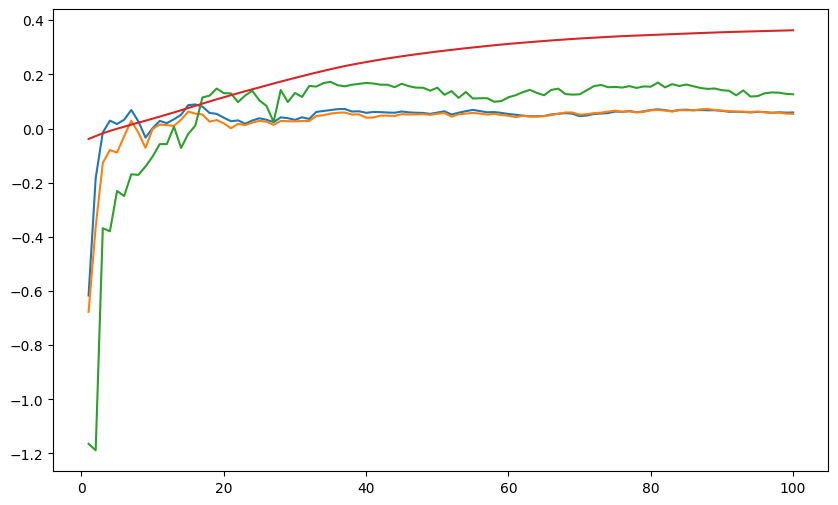

In [13]:
# Do the same as above with the PCA data
plt.figure(figsize=(10, 6))

for model, param_grid, name in zip([rf, bagging, boosting, svr], param_grids, ['Random Forest', 'Bagging', 'Boosting', 'SVR']):
    model_grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
    # Fit the grid search model
    model_grid.fit(X_pca, y_train)
    model.fit(X_pca, y_train)
    y_pred = model.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    plt.plot(range(1, 101), model_grid.cv_results_['mean_test_score'], label=name)
    print(f'{name} MSE: {mse}')
    print(f'Best {name} params: {model_grid.best_params_}')